In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [52]:
data=pd.read_csv('mpg_raw.csv')

In [53]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [54]:
#since name is of no use for us due to obvious reasons so we drop it
data=data.drop('name',axis=1)

In [56]:
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
5,15.0,8,429.0,198.0,4341,10.0,70,usa
6,14.0,8,454.0,220.0,4354,9.0,70,usa
7,14.0,8,440.0,215.0,4312,8.5,70,usa
8,14.0,8,455.0,225.0,4425,10.0,70,usa
9,15.0,8,390.0,190.0,3850,8.5,70,usa


In [57]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [58]:
#since the horsepower is has 6 null value which is very less proportion of sample so we remove those row
data=data.dropna(how='any',axis=0)

In [59]:
data.shape

(392, 8)

In [60]:
le=preprocessing.LabelEncoder()
data['origin']=le.fit_transform(data['origin'])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [62]:
data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2
5,15.0,8,429.0,198.0,4341,10.0,70,2
6,14.0,8,454.0,220.0,4354,9.0,70,2
7,14.0,8,440.0,215.0,4312,8.5,70,2
8,14.0,8,455.0,225.0,4425,10.0,70,2
9,15.0,8,390.0,190.0,3850,8.5,70,2


while doing EDA analysis we should have noticed that there is a high correlation among numerical attributes(displacement,horsepower,weight,cylinder) which violates the non-multicollinearity condition of linear regression.So to avoid this first find VIF and those have high VIF remove it from data

In [12]:
X1 = sm.tools.add_constant(data) 
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
series1

/home/amankumar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           781.079169
mpg               5.541199
cylinders        10.698645
displacement     22.803502
horsepower        9.640589
weight           14.051992
acceleration      2.630344
model_year        2.066282
origin            1.805925
dtype: float64

In [13]:
# By seeing the above info the value which have value above 5 are highly correlated and we have to remove it
new_data=data.drop(['cylinders','displacement','weight'],axis=1)
new_data.head()

,mpg,horsepower,acceleration,model_year,origin
0,18.0,130.0,12.0,70,2
1,15.0,165.0,11.5,70,2
2,18.0,150.0,11.0,70,2
3,16.0,150.0,12.0,70,2
4,17.0,140.0,10.5,70,2


In [14]:
#now checking again the VIP value
X2 = sm.tools.add_constant(new_data) 
series2 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)
series2

const           701.238373
mpg               3.858748
horsepower        4.340756
acceleration      2.069711
model_year        1.681410
origin            1.434689
dtype: float64

Now there is no correlation among independent attribute.Now we can train our models

### Training Regression Model

In [15]:
X=new_data.drop('mpg',axis=1)
y=new_data['mpg']
X_scale=preprocessing.scale(X)
X_scale=pd.DataFrame(X_scale,columns=X.columns)#because scale reture 2D array

In [43]:
X.columns

Index(['horsepower', 'acceleration', 'model_year', 'origin'], dtype='object')

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.2,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
pred=model.predict(X_test)
# score the model on the train set
print('Train score: {}\n'.format(model.score(X_train,y_train)))
# score the model on the test set
print('Test score: {}\n'.format(model.score(X_test,y_test)))
# calculate the overall accuracy of the model
print('Overall model accuracy: {}\n'.format(r2_score(y_test,pred)))
# compute the mean squared error of the model
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,pred)))

Train score: 0.7325611682880999

Test score: 0.771266655590977

Overall model accuracy: 0.771266655590977

Mean Squared Error: 14.216993039211465


In [18]:
#now using ridge regression
ridge=Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
pred_ridge=ridge.predict(X_test)

In [19]:
# score the model to check the accuracy
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,pred_ridge)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,pred_ridge)))

Train score: 0.7325611669692217

Test score: 0.7712664112726865

Overall model accuracy: 0.7712664112726865

Mean Squared Error: 14.217008224891737


In [20]:
#now we try parameter tuning for the ridge regression for better accuracy
tune_ridge=Ridge()
param={'alpha':[0,0.1,0.01,0.001,1]}#defining possible parameters
search_ridge=GridSearchCV(tune_ridge,param,cv=5,n_jobs=-1)
search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [21]:
print('Best parameter found:\n{}'.format(search_ridge.best_params_))
print('Train score: {}\n'.format(search_ridge.score(X_train,y_train)))
print('Test score: {}'.format(search_ridge.score(X_test,y_test)))

Best parameter found:
{'alpha': 0.1}
Train score: 0.7325610366284923

Test score: 0.7712641314501296


In [22]:
#let now build lasso model
lasso_model=Lasso()
param['max_iter']=[1000,10000,100000,1000000]
lasso_search=GridSearchCV(lasso_model,param,cv=5,n_jobs=-1)
lasso_search.fit(X_train,y_train)

/home/amankumar/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:880: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/home/amankumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/amankumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2528.1866423782135, tolerance: 1.890665335463258
  positive)


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1],
                         'max_iter': [1000, 10000, 100000, 1000000]})

In [23]:
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0, 'max_iter': 1000000}

Train score: 0.7325611682880999

Test score: 0.7712666555909412


In [24]:
#now going to use ensemble learning
#using original data which is unscaled
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [49]:
X['origin'].unique()

array([2, 1, 0])

In [25]:
dtree=DecisionTreeRegressor()

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}

dtree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)
dtree_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [26]:
dtree_pred=dtree_search.predict(X_test)

In [27]:
print('Best parameter found:\n{}\n'.format(dtree_search.best_params_))
print('Train score: {}\n'.format(dtree_search.score(X_train,y_train)))
print('Test score: {}\n'.format(dtree_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,dtree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,dtree_pred)))

Best parameter found:
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 3}

Train score: 0.8567253976383535

Test score: 0.8387672155193977

Overall model accuracy: 0.8387672155193977

Mean Squared Error: 9.318006622493938


In [28]:
#now usinf RandomForestRegressor model
rforest=RandomForestRegressor()
params['n_estimators']=[100,200,300,400,500]
forest_search=RandomizedSearchCV(rforest,params,cv=5,n_jobs=-1,n_iter=50)
forest_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [29]:
rforest_pred=forest_search.predict(X_test)

In [30]:
print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(X_train,y_train)))
print('Test score: {}\n'.format(forest_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,rforest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,rforest_pred)))

Best parameter found:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 6}

Train score: 0.912517305082964

Test score: 0.8778453186866964

Overall model accuracy: 0.8778453186866964

Mean Squared Error: 7.059594815736373


In [31]:
#now fitting our last ensemble model GradientBoostingRegressor

gradient_model = GradientBoostingRegressor()
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]
gradient_search=RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1,n_iter=50)
gradient_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [32]:
gradient_pred = gradient_search.predict(X_test)

In [33]:
print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(X_train,y_train)))
print('Test score: {}\n'.format(gradient_search.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,gradient_pred)))

Best parameter found:
{'n_estimators': 300, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 2, 'learning_rate': 0.05}

Train score: 0.9055445134419834

Test score: 0.8947217663070128

Overall model accuracy: 0.8947217663070128

Mean Squared Error: 6.084266806629144



Since by seeing all the model of ensemble learning we came to know random forest and gradient boosting model give almost same accuracy and random forest is somewhat have upper hand on gradient boosting so we use random forest regressor 

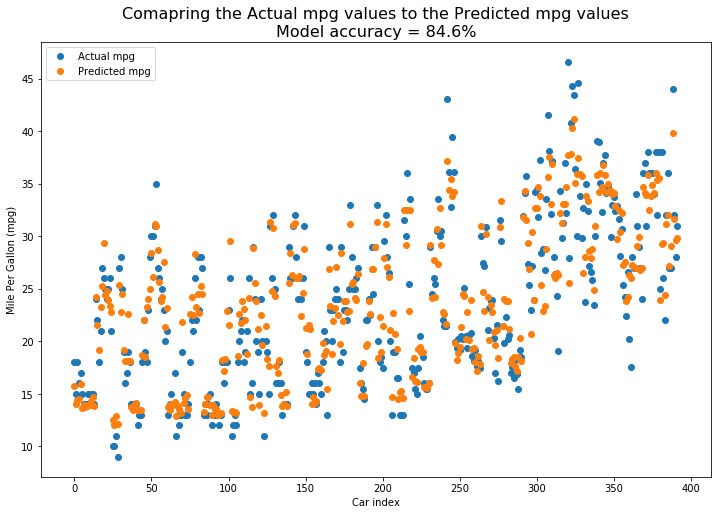

In [34]:

newcars_new = new_data.drop('mpg',axis=1)  # create a new DataFrame of the feature variables

# make a DataFrame of the actual mpg and the predicted mpg 
data = pd.DataFrame({'Actual mpg':new_data.mpg.values,
                    'Predicted mpg':forest_search.predict(newcars_new.values)})


# make a scatter plot of the actual and the predicted mpg of a car
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 84.6%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

By seeing the graph it seems that our random forest doing good predictions because the actual and predicted mpg values are almost equal

In [35]:
data

,Actual mpg,Predicted mpg
0,18.0,15.761705
1,15.0,14.057362
2,18.0,14.431217
3,16.0,14.494642
4,17.0,15.910272
...,...,...
387,27.0,29.091322
388,44.0,39.837055
389,32.0,31.592628
390,28.0,29.647066


In [36]:
#lets the error(residual)
data['Residuals'] = data['Actual mpg']-data['Predicted mpg']
data

,Actual mpg,Predicted mpg,Residuals
0,18.0,15.761705,2.238295
1,15.0,14.057362,0.942638
2,18.0,14.431217,3.568783
3,16.0,14.494642,1.505358
4,17.0,15.910272,1.089728
...,...,...,...
387,27.0,29.091322,-2.091322
388,44.0,39.837055,4.162945
389,32.0,31.592628,0.407372
390,28.0,29.647066,-1.647066


In [37]:
import pickle
file = open('MPG_model.pkl', 'wb')
pickle.dump(gradient_search, file)

In [38]:
model = open('MPG_model.pkl','rb')
gradient = pickle.load(model)

In [40]:
y_prediction = gradient.predict(X_test)

In [42]:
from sklearn import metrics
metrics.r2_score(y_test, y_prediction)

0.8947217663070128